### Problem Statement:  Classifying Amazon reviews based on customer ratings using NLP

#### Impact
Reviews provide objective feedback to a product and are therefore inherently useful for consumers. These ratings are often summarized by a numerical rating, or the number of stars. Of course there is more value in the actual text itself than the quantified stars. And at times, the given rating does not truly convey the experience of the product – the heart of the feedback is actually in the text itself. The goal therefore is to build a classifier that would understand the essence of a piece of review and assign it the most appropriate rating based on the meaning of the text.

#### Background
Though product ratings on Amazon are aggregated from all the reviews by every customer, each individual rating is actually only an integer that ranges from one star to five stars. This reduces our predictions to discrete classes totaling five possibilities. Therefore what we'll have is a supervised, multi-class classifier with the actual review text as the core predictor.

This study is an exploration of Natural Language Processing (NLP). The goal of predicting the star rating given a piece of text will take on different NLP topics including word embedding, topic modeling, and dimension reduction. From there, we'll arrive at a final dataframe and we'll be employing different machine learning techniques in order to come up with the best approach (i.e. most accurate estimator) for our classifier.

### Datasets
The Amazon dataset contains the customer reviews for all listed Sports and Outdoors products spanning from May 1996 up to July 2014. There are a total of 296,337 reviews by a total of 31,176 customers on 18,357 unique products. The data dictionary is as follows:

### asin - 
Unique ID of the product being reviewed, string
#### helpful - 
A list with two elements: the number of users that voted helpful, and the total number of users that voted on the review (including the not helpful votes), list
#### overall - 
The reviewer's rating of the product, int64
#### reviewText - 
The review text itself, string
#### reviewerID - 
Unique ID of the reviewer, string
#### reviewerName - 
Specified name of the reviewer, string
#### summary - 
Headline summary of the review, string
#### unixReviewTime - 
Unix Time of when the review was posted, string

In [1]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
import os
import pandas as pd
df = pd.read_json("Sports_and_Outdoors_5.json", lines=True)

In [3]:
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5,Woks very good,1390694400,"01 26, 2014"
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5,Works as well as the factory tool,1328140800,"02 2, 2012"
2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]",If you don't have a 3/32 punch or would like t...,4,"It's a punch, that's all.",1330387200,"02 28, 2012"
3,A148SVSWKTJKU6,1881509818,"Jusitn A. Watts ""Maverick9614""","[0, 0]",This works no better than any 3/32 punch you w...,4,It's a punch with a Glock logo.,1328400000,"02 5, 2012"
4,AAAWJ6LW9WMOO,1881509818,Material Man,"[0, 0]",I purchased this thinking maybe I need a speci...,4,"Ok,tool does what a regular punch does.",1366675200,"04 23, 2013"
5,A2XX2A4OJCDNLZ,1881509818,RatherLiveInKeyWest,"[0, 0]","Needed this tool to really break down my G22, ...",5,Glock punch tool - needed for your Glock and o...,1351814400,"11 2, 2012"
6,A283UOBQRUNM4Q,1881509818,Thomas Dragon,"[0, 0]",If u don't have it .. Get it. All you need to ...,5,Great tool,1402358400,"06 10, 2014"
7,AWG3H90WVZ0Z1,2094869245,Alec Nelson,"[0, 0]",This light will no doubt capture the attention...,4,Bright!,1377907200,"08 31, 2013"
8,A3V52OTJHKIJZX,2094869245,"A. Saenz Jr. ""Bettering self""","[0, 1]","Light and laser torch work well, very bright. ...",5,Be seen,1369612800,"05 27, 2013"
9,A3SZBE5F3UQ9EC,2094869245,"ChasRat ""ChasRat""","[0, 0]",Does everything it says it will do. I would li...,5,Bicycle rear tail light,1383350400,"11 2, 2013"


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296337 entries, 0 to 296336
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      296337 non-null  object
 1   asin            296337 non-null  object
 2   reviewerName    294935 non-null  object
 3   helpful         296337 non-null  object
 4   reviewText      296337 non-null  object
 5   overall         296337 non-null  int64 
 6   summary         296337 non-null  object
 7   unixReviewTime  296337 non-null  int64 
 8   reviewTime      296337 non-null  object
dtypes: int64(2), object(7)
memory usage: 20.3+ MB
None


In [5]:
from datetime import datetime

condition = lambda row: datetime.fromtimestamp(row).strftime("%m-%d-%Y")
df["unixReviewTime"] = df["unixReviewTime"].apply(condition)

The reviewTime is dropped since the unixReviewTime series more accurately describes the time when each review was posted.

In [6]:
df.drop(labels="reviewTime", axis=1, inplace=True)

display(df.head())

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5,Woks very good,01-25-2014
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5,Works as well as the factory tool,02-01-2012
2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]",If you don't have a 3/32 punch or would like t...,4,"It's a punch, that's all.",02-27-2012
3,A148SVSWKTJKU6,1881509818,"Jusitn A. Watts ""Maverick9614""","[0, 0]",This works no better than any 3/32 punch you w...,4,It's a punch with a Glock logo.,02-04-2012
4,AAAWJ6LW9WMOO,1881509818,Material Man,"[0, 0]",I purchased this thinking maybe I need a speci...,4,"Ok,tool does what a regular punch does.",04-22-2013


Each review is stored as string in the reviewText series. A sample product review is below:

In [7]:
print(df["reviewText"].iloc[0])

This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy


Each review is associated with a rating stored under the overall field. This serves as the quantified summary of a given review and will thus be used as the ground truth labels for the model.

In [8]:
print(df.overall.unique())

[5 4 3 2 1]


# NLP Pre-Processing

We'll work with reviewText to prepare our model's final dataframe. The goal is to produce tokens for every document (i.e. every review). These documents will make up our corpora where we'll draw our vocabulary from.

The following is a sample text in its original form.

In [9]:
sample_review = df["reviewText"].iloc[54235]
print(sample_review)

These are clear, crisp scopes with decent light gathering ability at dusk/dawn.  Hard to go wrong at the prices Amazon lists these.  Note that overall length is a bit much for some short stock .22 mounts.  These work fine but you will need to mount the scope far forward which looks a bit awkward on some applications.  I have always had good luck with Simmons and I have many scopes.  And run the lens through the 3-9 settings a few times to free them up before mounting.  Simmons scopes are historical for difficult adjustment out of the box. Better to run back and forth a few times off the mounts than post mounting.  Enjoy!


## HTML Entities

Some special characters like the apostrophe (’) and the en dash (–) are expressed as a set of numbers prefixed by &# and suffixed by ;. This is because the dataset was scraped from an HTML parser, and the dataset itself includes data that predated the universal UTF-8 standard.

These HTML Entities can be decoded by importing the html library.

In [10]:
import html

decoded_review = html.unescape(sample_review)
print(decoded_review)

These are clear, crisp scopes with decent light gathering ability at dusk/dawn.  Hard to go wrong at the prices Amazon lists these.  Note that overall length is a bit much for some short stock .22 mounts.  These work fine but you will need to mount the scope far forward which looks a bit awkward on some applications.  I have always had good luck with Simmons and I have many scopes.  And run the lens through the 3-9 settings a few times to free them up before mounting.  Simmons scopes are historical for difficult adjustment out of the box. Better to run back and forth a few times off the mounts than post mounting.  Enjoy!


Since punctuation marks do not add value in the way we'll perform NLP, all the HTML entities in the review texts can be dropped. The output series preprocessed is our reviewText but without the special characters.

In [11]:
pattern = r"\&\#[0-9]+\;"

df["preprocessed"] = df["reviewText"].str.replace(pat=pattern, repl="", regex=True)

print(df["preprocessed"].iloc[54235])

These are clear, crisp scopes with decent light gathering ability at dusk/dawn.  Hard to go wrong at the prices Amazon lists these.  Note that overall length is a bit much for some short stock .22 mounts.  These work fine but you will need to mount the scope far forward which looks a bit awkward on some applications.  I have always had good luck with Simmons and I have many scopes.  And run the lens through the 3-9 settings a few times to free them up before mounting.  Simmons scopes are historical for difficult adjustment out of the box. Better to run back and forth a few times off the mounts than post mounting.  Enjoy!


## Extracting the root word

How often a word is used is key information in natural language processing. It is therefore important to reduce words to their root form. An example would be the usage of the word "learn". If we differentiate this base form from a modified version like "learning" then we might lose relational context between two documents that have used either word.

We'll be using Lemmatization to reduce tokens to their base word. This technique takes into account context similarity according to part-of-speech anatomy. Stemming is another common approach, although stemming only performs truncation and would not be able to reduce "taught" to "teach".

We will be using the WordNetLemmatizer from the Natural Language Toolkit (or NLTK). Lemmatization only applies to each word but it is dependent on sentence structure to understand context. We therefore need to have part-of-speech tags associated with each word. Our output is derived from applying the lemmatize_doc function to our preprocessed column.

The lemmatize_doc works as follows:

Each review is broken down into a list of sentences 

Punctuations that only group words or separate sentences (hyphens therefore are excluded) are removed (replaced by whitespace) using RegEx 

Every sentence is further broken down into words (tokens)

Each of the sentences then becomes an ordered bag of words. Every word is then tagged to a part-of-speech. This word-tag tuple pair is then fed one at a time to the lemmatize_word function, which works as follows:

Only modifiable words – nouns, verbs, adjectives, and adverbs – can be reduced to roots

These words are lemmatized and appended to the root list

Words that are not modifiable are added as they are to the root list



The output lists are linked together as a string using whitespace. In the end, each preprocessed review will retain its text form but with each word simplified as much as possible.

In [12]:
%%time
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
resources = ["wordnet", "stopwords", "punkt", \
             "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)

#create Lemmatizer object
lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root

def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

#apply our functions
df["preprocessed"] = df["preprocessed"].apply(lambda row: lemmatize_doc(row))

print(df["preprocessed"].iloc[54235])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bsnus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bsnus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bsnus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\bsnus\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


These be clear crisp scope with decent light gather ability at dusk/dawn Hard to go wrong at the price Amazon list these Note that overall length be a bit much for some short stock 22 mount These work fine but you will need to mount the scope far forward which look a bit awkward on some application I have always have good luck with Simmons and I have many scope And run the lens through the 3-9 setting a few time to free them up before mount Simmons scope be historical for difficult adjustment out of the box Better to run back and forth a few time off the mount than post mounting Enjoy
Wall time: 1h 7min 23s


# Removing Accents

Each review is normalized from longform UTF-8 to ASCII encoding. This will remove accents in characters and ensure that words like "naïve" will simply be interpreted as (and therefore not differentiated from) "naive".

In [12]:
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df["preprocessed"] = df["preprocessed"].apply(remove_accent)

print(df["preprocessed"].iloc[54235])

These are clear, crisp scopes with decent light gathering ability at dusk/dawn.  Hard to go wrong at the prices Amazon lists these.  Note that overall length is a bit much for some short stock .22 mounts.  These work fine but you will need to mount the scope far forward which looks a bit awkward on some applications.  I have always had good luck with Simmons and I have many scopes.  And run the lens through the 3-9 settings a few times to free them up before mounting.  Simmons scopes are historical for difficult adjustment out of the box. Better to run back and forth a few times off the mounts than post mounting.  Enjoy!


# Removing Punctuations

The preprocessed reviews are further cleaned by dropping punctuations. Using regular expressions, only whitespaces and alphanumeric characters are kept.

In [13]:
pattern = r"[^\w\s]"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df["preprocessed"].iloc[54235])

These are clear  crisp scopes with decent light gathering ability at dusk dawn   Hard to go wrong at the prices Amazon lists these   Note that overall length is a bit much for some short stock  22 mounts   These work fine but you will need to mount the scope far forward which looks a bit awkward on some applications   I have always had good luck with Simmons and I have many scopes   And run the lens through the 3 9 settings a few times to free them up before mounting   Simmons scopes are historical for difficult adjustment out of the box  Better to run back and forth a few times off the mounts than post mounting   Enjoy 


# Converting to Lower Case 

Every letter is also converted to lower case. This makes it so that "iPhone" will not be distinguishable from "iphone".

In [14]:
df["preprocessed"] = df["preprocessed"].str.lower()

print(df["preprocessed"].iloc[54235])

these are clear  crisp scopes with decent light gathering ability at dusk dawn   hard to go wrong at the prices amazon lists these   note that overall length is a bit much for some short stock  22 mounts   these work fine but you will need to mount the scope far forward which looks a bit awkward on some applications   i have always had good luck with simmons and i have many scopes   and run the lens through the 3 9 settings a few times to free them up before mounting   simmons scopes are historical for difficult adjustment out of the box  better to run back and forth a few times off the mounts than post mounting   enjoy 


# Removing Stop Words

Stop words consist of the most commonly used words that include pronouns (e.g. us, she, their), articles (e.g. the), and prepositions (e.g. under, from, off). These words are not helpful in distinguishing a document from another and are therefore dropped.

Note that the stop_words were stripped of punctuations just as what we have done to our dataset.

In [15]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]

print(f"sample stop words: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
df["preprocessed"] = df["preprocessed"].apply(remove_stop_words)

print(df["preprocessed"].iloc[54235])

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 

clear  crisp scopes decent light gathering ability dusk dawn   hard go wrong prices amazon lists   note overall length bit much short stock  22 mounts   work fine need mount scope far forward looks bit awkward applications   always good luck simmons many scopes   run lens 3 9 settings times free mounting   simmons scopes historical difficult adjustment box  better run back forth times mounts post mounting   enjoy 


# Removing Extra Spaces

Again, we make use of regular expressions to ensure we never get more than a single whitespace to separate words in our sentences.

In [16]:
pattern = r"[\s]+"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df["preprocessed"].iloc[54235])

clear crisp scopes decent light gathering ability dusk dawn hard go wrong prices amazon lists note overall length bit much short stock 22 mounts work fine need mount scope far forward looks bit awkward applications always good luck simmons many scopes run lens 3 9 settings times free mounting simmons scopes historical difficult adjustment box better run back forth times mounts post mounting enjoy 


# Tokenization

The entries for the preprocessed column are extracted to make up our corpora, which is simply a collection of all our documents. Each review is then transformed into an ordered list of words. This is the process of tokenization – the document is broken down into individual words or tokens.

Our tokenized sample review is below:

In [17]:
corpora = df["preprocessed"].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized[54235])

['clear', 'crisp', 'scopes', 'decent', 'light', 'gathering', 'ability', 'dusk', 'dawn', 'hard', 'go', 'wrong', 'prices', 'amazon', 'lists', 'note', 'overall', 'length', 'bit', 'much', 'short', 'stock', '22', 'mounts', 'work', 'fine', 'need', 'mount', 'scope', 'far', 'forward', 'looks', 'bit', 'awkward', 'applications', 'always', 'good', 'luck', 'simmons', 'many', 'scopes', 'run', 'lens', '3', '9', 'settings', 'times', 'free', 'mounting', 'simmons', 'scopes', 'historical', 'difficult', 'adjustment', 'box', 'better', 'run', 'back', 'forth', 'times', 'mounts', 'post', 'mounting', 'enjoy', '']


# Phrase Modeling

Since order of words matter in most NLP models, it is often helpful to group neighboring words that appear to convey one meaning as though they are a single word, like smart TV.

To be considered a phrase, the number of times that two words should appear next to each other is set to at least 300. The threshold then takes that minimum and compares it to the total number of token instances in the corpora. The higher the threshold, the more often two words must appear adjacent to be grouped into a phrase.

In [18]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=300, threshold=50)

tri_gram = Phrases(bi_gram[tokenized], min_count=300, threshold=50)

# Unigrams

Unigrams are single pieces of tokens. The code below takes all the unique words from the entire corpora and prints a sample:

In [19]:
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:50])

['302', 'grippiness', 'redeiver', 'declined', 'lightweigh', 'monkey', 'hooking', 'epson', 'padyup', 'r086l', 'frogman', 'poco', '5a12v', 'litter', 'worksthese', 'speidel', 'comatose', 'mcgyver', 'belt1', 'postpaid', 'lolsome', 'cleansed', 'is1', 'fid', 'youtub3', 'dominion', 'teaspoon', 'infectation', 'firarm', 'thesmart', 'kickass', 'wharehouse', 'subdivision', 'm35a3', 'playthey', 'dependng', 'expoxy', 'amh', 'toto', '9x18mm', 'nsn', 'barsmonkeys', 'wounderful', 'hulls', 'opined', 'fwup', 'edgegreat', 'midnight', 'ihealth', 'inserter']


# Bigrams

Bigrams are generated from using the gensim phraser. Only those that pass the bi_gram criteria are considered.

The code below takes all the unique bigram phrases from the entire corpora:

In [20]:
bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
bi_gram_tokens = set([token.decode("utf-8") \
                      for token in bi_gram_tokens])

bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50])

['', 'several_months', 'new_one', 'get_way', '4_5', 'time_tell', 'bought_use', 'bought_2', 'like_fact', 'huge_difference', 'would_look', 'either_way', 'something_would', 'quality_materials', 'worked_fine', 'old_one', 'hard_get', 'pleased_purchase', 'far_best', 'waste_time', '1_3', 'durable_', 'fit_good', 'sent_back', 'else_', 'really_nice', 'great_feel', '3_months', 'nothing_special', 'may_get', 'like_little', 'work_really', 'hard_case', 'easily_fit', 'beat_', 'give_five', 'quality_well', 'g_10', 'much_larger', 'easy_way', 'get_lot', 'ever_seen', 'also_good', '6_8', 'yet_', 'better_nothing', 'recommend_anyone', 'work_well', 'would_purchase', 'fast_']


# Trigrams

Trigrams are generated by applying another gensim phraser on top of a bigram phraser. Take for example the tokens sd and card. Because they appear often together enough, they become linked together as sd_card. In turn, if sd_card appears adjacent to the token reader in enough instances, then the tri_gram model would link them together as well to tokenize sd_card_reader.

The code below takes all the unique trigram phrases from the entire corpora:

In [21]:
trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([token.decode("utf-8") \
                       for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50])

['4_5_stars', 'swiss_army_knife', 'gets_job_done', 'worth_every_penny', 'give_5_stars', 'heart_rate_monitor', 'year_old_son', 'highly_recommend_product', 'red_dot_sight', 'highly_recommend_anyone', 'cant_go_wrong', 'ruger_10_22', '5_star_rating', 'would_highly_recommend', 'get_job_done', 'first_aid_kit', 'http_www_amazon_com']


The tri_gram and bi_gram phrasers are applied to our tokenized corpora.

In [22]:
tokenized = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokenized]

print(tokenized[54235])

['clear', 'crisp', 'scopes', 'decent', 'light', 'gathering', 'ability', 'dusk', 'dawn', 'hard', 'go', 'wrong', 'prices', 'amazon', 'lists', 'note', 'overall', 'length', 'bit', 'much', 'short', 'stock', '22', 'mounts', 'work', 'fine', 'need', 'mount', 'scope', 'far', 'forward', 'looks', 'bit', 'awkward', 'applications', 'always', 'good', 'luck', 'simmons', 'many', 'scopes', 'run', 'lens', 'settings', 'times', 'free', 'mounting', 'simmons', 'scopes', 'historical', 'difficult', 'adjustment', 'box', 'better', 'run', 'back', 'forth', 'times', 'mounts', 'post', 'mounting', 'enjoy']


# Creating the Vocabulary

The vocabulary is the key-value pairs of all the unique tokens from every product review. Each token is assigned a lookup ID. The first 10 words in our dictionary are as follows:

In [23]:
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id)[0:10]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: 32
ID: 1, Token: already
ID: 2, Token: came
ID: 3, Token: easy
ID: 4, Token: glock
ID: 5, Token: happy
ID: 6, Token: haved
ID: 7, Token: makes
ID: 8, Token: pins
ID: 9, Token: taking


# Count-based Feature Engineering

In order for a machine learning model to work with text input, the document must first be vectorized. This simply means that the input has to be converted into containers of numerical values.

## Bag of Words Model

The classical approach in expressing text as a set of features is getting the token frequency. Each entry to the dataframe is a document while each column corresponds to every unique token in the entire corpora. The row will identify how many times a word appears in the document. The bow model for the sample review is below:

In [24]:
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

for idx, freq in bow[0]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: 32, Frequency: 1
Word: already, Frequency: 1
Word: came, Frequency: 1
Word: easy, Frequency: 1
Word: glock, Frequency: 1
Word: happy, Frequency: 1
Word: haved, Frequency: 1
Word: makes, Frequency: 1
Word: pins, Frequency: 1
Word: taking, Frequency: 1
Word: time, Frequency: 1
Word: used, Frequency: 1
Word: veru, Frequency: 1


## TF-IDF Model

The Term Frequency-Inverse Document Frequency (TF-IDF) approach assigns continuous values instead of simple integers for the token frequency. Words that appear frequently overall tend to not establish saliency in a document, and are thus weighted lower. Words that are unique to some documents tend to help distinguish it from the rest and are thus weighted higher. The tfidf weighting is based on our bow variable.

In [25]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: 32, Weight: 0.277
Word: already, Weight: 0.193
Word: came, Weight: 0.155
Word: easy, Weight: 0.102
Word: glock, Weight: 0.222
Word: happy, Weight: 0.165
Word: haved, Weight: 0.511
Word: makes, Weight: 0.142
Word: pins, Weight: 0.285
Word: taking, Weight: 0.221
Word: time, Weight: 0.106
Word: used, Weight: 0.104
Word: veru, Weight: 0.585


# Word Embedding for Feature Engineering

The downside of count-based techniques is that without regard to word sequence and sentence structure, the semantics get lost. The Word2Vec technique, on the other hand, actually embeds meaning in vectors by quantifying how often a word appears within the vicinity of a given set of other words.

A context window the span of context_size slides across every document one token at a time. In each step, the center word is described by its adjacent words and the probability that the token appears together with the others is expressed in feature_size dimensions. Since the minimum word requirement is set to 1, every token in the corpora is embedded in the Word2Vec model.

In [26]:
%%time
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 100
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(tokenized, size=feature_size, \
                            window=context_size, min_count=min_word, \
                            iter=50, seed=42)

Wall time: 30min 48s


# Final Dataframe

The goal is to have a dataframe with observations corresponding to the product reviews. The word_vec model is used to gather all the unique tokens in the corpora. This enables us to generate the word_vec_df which makes use of the dimensions as the features of every word.

In [27]:
word_vec_unpack = [(word, idx.index) for word, idx in \
                   word_vec.wv.vocab.items()]

tokens, indexes = zip(*word_vec_unpack)

word_vec_df = pd.DataFrame(word_vec.wv.syn0[indexes, :], index=tokens)

display(word_vec_df.head())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
came,-4.422883,-4.380722,-3.715131,3.924869,-3.215366,-3.564497,-1.087700,3.327777,-3.824492,-0.587074,...,1.177725,1.164079,-3.088659,2.076843,-5.902970,0.123646,-4.158592,0.746767,4.320853,2.109019
time,0.564219,-1.690202,1.582819,4.034480,-1.441745,1.545375,3.371564,-1.017074,1.812059,1.937450,...,-2.163654,-0.820913,-4.020450,0.809784,2.394734,0.460095,2.274822,-4.068288,-1.260473,0.995758
veru,-0.175506,-0.434608,0.347559,-0.345566,-0.028891,0.372979,0.629422,-0.290313,-0.583684,-0.596186,...,-0.354764,0.163449,-0.272088,-0.132778,-0.570157,-0.491077,0.188612,-0.405853,-0.402796,0.397000
happy,-3.185618,-6.217606,-1.528648,2.046001,0.083041,2.808263,-0.141315,-0.872608,0.803819,3.063576,...,-3.523173,1.083387,-1.540045,1.864501,-0.545142,-2.809758,-3.745014,-2.207804,-4.884945,-0.336215
haved,0.116583,0.680203,0.420984,-0.035088,0.347136,-1.337285,0.834881,-0.110236,0.671471,-0.804630,...,1.532872,-0.164101,0.753274,-0.795430,-0.510435,-0.010959,0.612455,-0.757131,-0.434156,-0.877498


The word_vec_df is sliced by the words that appear in a given tokenized review and the mean along every dimension is taken. The resulting model_array shape is therefore the word count on axis 0 and the number of dimensions on axis 1. This singularizes multiple word embeddings into one observation for each review.

If multiple occurrences of a word occurs in a review, then this only emphasizes the token since the row is pulled towards the values of the vectors of that word.

In [28]:
%%time
tokenized_array = np.array(tokenized)

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

Wall time: 6min 14s


Every document is provided the ground truth label by imposing its overall rating. This completes our finalized model_df dataframe.

In [29]:
model_df = pd.DataFrame(model_array)
model_df["label"] = df["overall"]

display(model_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-1.233279,-2.066844,0.643534,1.674372,-0.001491,-0.242849,0.080919,-1.161204,0.193892,0.045115,...,0.028826,-1.187316,-0.621442,-1.138381,0.564126,0.037273,-0.828102,-0.742603,-0.015238,5
1,-2.218147,-0.410946,0.619057,0.016264,-0.371837,0.357611,1.399552,-0.431368,0.961839,-0.432180,...,-0.179135,-1.501508,-1.110324,-1.495706,0.279142,-1.057398,0.377431,-1.266594,0.753725,5
2,-0.350198,-1.048086,1.185250,0.536564,-0.335335,1.177607,-0.058351,-1.450808,1.137380,0.697489,...,0.682065,-0.116607,0.497025,-3.143661,1.991389,0.764304,1.369789,-0.794052,-0.124860,4
3,1.262624,-1.224869,-0.789351,1.806180,2.261130,0.452796,0.451479,-1.936634,0.163677,-0.968907,...,-0.241168,0.051377,0.241632,-1.491156,1.527640,1.160012,1.978624,-0.997738,-0.700038,4
4,0.863170,-0.792637,0.400684,1.015304,0.625541,0.216254,1.347426,-0.225008,0.719776,0.106507,...,1.214030,-0.020290,-0.566315,-1.194049,1.810051,0.280242,1.721494,-1.030984,-0.200590,4


# Principal Component Analysis

Principal Component Analysis (PCA) is a dimensionality reduction technique that we can use on our model_df to reduce its 100 dimensions to just two dimensions. This will help visualize if there is a clear decision boundary along the five overall rating classifications. The more datapoints belonging to the same class are clustered together, the higher the likelihood that our machine learning model is simpler and more effective.

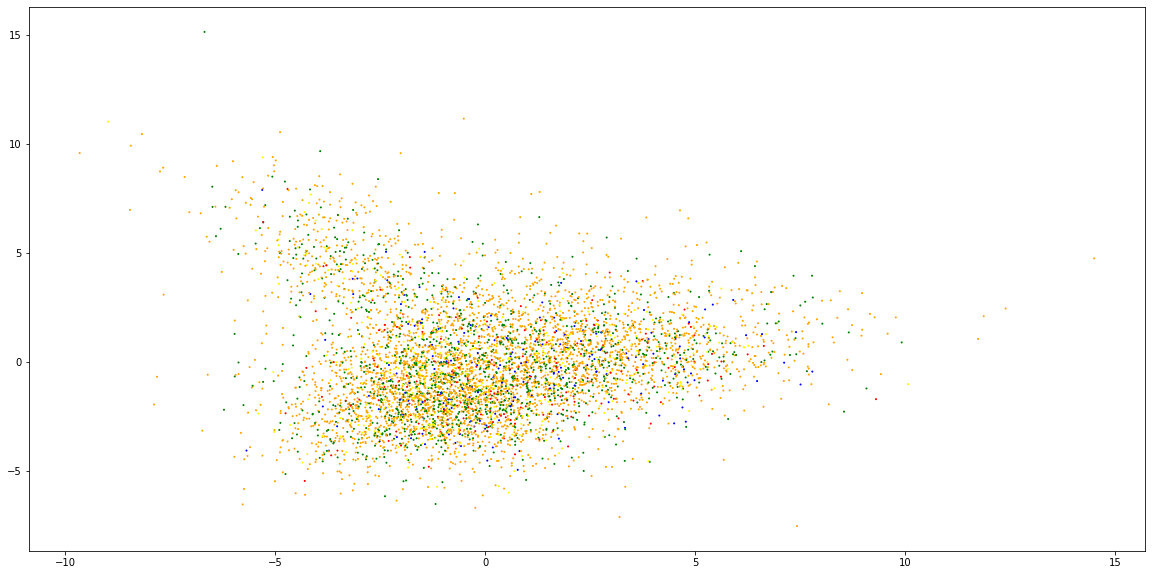

In [30]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

#sampling the model_df population
pca_df = model_df.reset_index()
pca_df = model_df.dropna(axis=0).iloc[:,1:]
pca_df = pca_df.iloc[::50]

#setting up PCA
pca = PCA(n_components=2, random_state=42)
pca = pca.fit_transform(pca_df.iloc[:, :-1])
labels = pca_df["label"]

#setting up plot components
x_axis = pca[:,0]
y_axis = pca[:,1]
color_map = pca_df["label"].map({1:"blue", \
                                 2:"red", \
                                 3:"yellow", \
                                 4:"green", \
                                 5:"orange"})

#plotting PCA
f, axes = plt.subplots(figsize=(20,10))
plt.scatter(x_axis, y_axis, color=color_map, s=1)
plt.show()


# Exploratory Data Analysis

## More on Word2Vec

To better appreciate the concept of word embeddings, we take five common words in our corpora and derive their five most related words using our word_vec model. The similarity comes from how often these tokens appear in the same window of words as their word_bank counterpart.

In [31]:
word_bank = ["tool", "glock", "punch", "light", "works"]

for word in word_bank[:]:
    related_vec = word_vec.wv.most_similar(word, topn=5)
    related_words = np.array(related_vec)[:,0]
    word_bank.extend(related_words)
    print(f"{word}: {related_words}")

tool: ['tools' 'toolkit' 'wrench' 'implements' 'plier']
glock: ['glocks' 'g19' 'gen4' 'g17' 'g23']
punch: ['hammer' 'punches' 'pins' 'sledge' 'pin']
light: ['bright' 'lights' 'led' 'headlight' 'lightto']
works: ['worked' 'work' 'performs' 'functioned' 'fits']


## t-SNE

Like PCA, the t-Distributed Stochastic Neighbor Embedding (t-SNE) is another dimensionality reduction technique that assists in visualizing high-dimensional datasets. To perceive the similarity between the related words in terms of spatial distance, t-SNE provided the coordinates of each word in a 2D scatterplot plane.

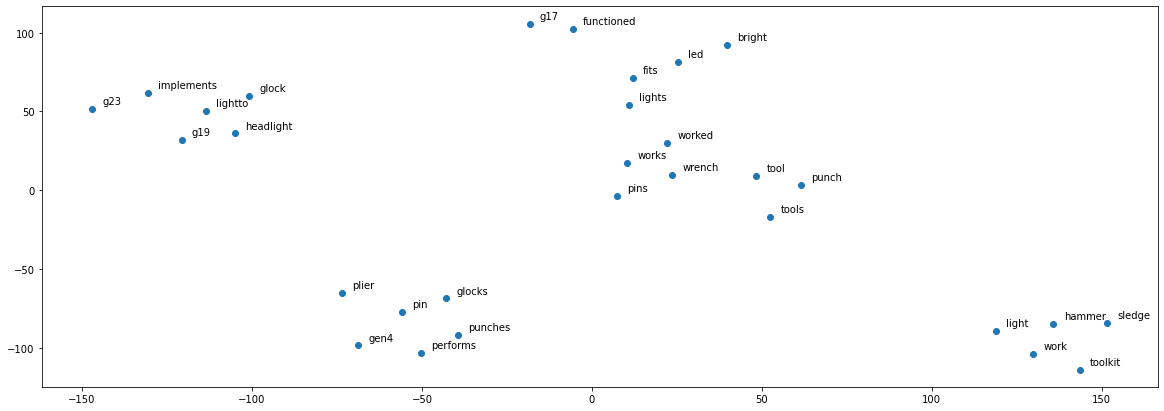

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)

sample_vecs = word_vec.wv[set(word_bank)]
sample_tsne = tsne.fit_transform(sample_vecs)
tsne_x = sample_tsne[:, 0]
tsne_y = sample_tsne[:, 1]

f, axes = plt.subplots(figsize=(20,7))
ax = plt.scatter(x=tsne_x, y=tsne_y)

for label, x, y in zip(word_bank, tsne_x, tsne_y):
    plt.annotate(label, xy=(x+3, y+3))

plt.show()

## Word Algebra

Since Word2Vec characterizes words into quantified tokens, we can consequently add or subtract word vectors together. To add is to combine the meaning of the components and to subtract is to take out the context of one token from another. The following are examples of this vector algebra and their similarity scores:

## Guns + Tools

In [33]:
word_vec.wv.most_similar(positive=["guns", "tools"], \
                      negative=[], topn=1)

[('firearms', 0.6794480681419373)]

## Deer - Hunting

In [34]:
word_vec.wv.most_similar(positive=["deer"], \
                      negative=["hunting"], topn=1)

[('inventor', 0.4603772759437561)]

## Basketball - Baseball

In [35]:
word_vec.wv.most_similar(positive=["basketball"], \
                      negative=["baseball"], topn=1)

[('misconceptions', 0.42441526055336)]

# Named-Entity Recognition

We've seen gensim perform word tagging to identify part-of-speech. Now we use spaCy to go further and identify what nouns in the documents refer to. Some Named-Entity Recognition (NER) classification tags include distinguishing persons, organizations, products, places, dates, etc.

In exploring spaCy, we'll be using the most_helpful_text, which is the highest-rated product review by Amazon users. The helpful series from the df dataframe is actually a list with its first element storing the number of helpful votes a review received, and the second element containing the total number of helpful and not helpful review votes.

In [36]:
helpful = df["helpful"].tolist()
most_helpful = max(helpful, key=lambda x: x[0])

most_helpful_idx = df["helpful"].astype(str) == str(most_helpful)
most_helpful_idx = df[most_helpful_idx].index

most_helpful_text = df["reviewText"].iloc[most_helpful_idx].values[0]

print(most_helpful_text)

This is a nuts set of workout DVD's. I am overweight and just shy of 40, but I have dreams of getting back into my pre-marriage body. I decided to seize the day and go for it, and I am not sorry. My muscles are currently screaming, every bit of me hurts. Every day, I both love and dread pushing play on this dvd, because I know what will happen when I do. I will spend 45 minutes gasping, lurching around, heart pounding, sweat running off me like a monsoon, desparately trying to keep up with a workout designed by fitness demigods. Afterwards, when I can catch my breath and pull myself up of the ground, I feel so good it is not even funny. Yesterday when I finished my workout and was talking to my wife, I said "You know what I feel like? I feel like I'm on vacation!". You know, that feeling you get on day 1 of vacation when you have the whole thing stretching before you, when there is a cool drink in your hands and not a care in the world? That's how I feel when my blood is pumping, when 

We use ner_dict, a dictionary initialized as a list, to segregate the nouns in the most_helpful_text into the NER tags.

In [46]:
%%time
import spacy

from collections import defaultdict

Wall time: 0 ns


In [62]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [64]:
nlp_helpful = nlp(most_helpful_text)

In [65]:
nlp_dict = defaultdict(list)

In [66]:
for entity in nlp_helpful.ents:
    nlp_dict[entity.label_].append(entity)

In [67]:
for NLP, name in nlp_dict.items():
    print(f"{NLP}:\n{name}\n")

ORG:
[DVD, Shaun T, Insanity, the Insane Posse of Fitness Gazelles, Shin, Insanity/p90x, --**Update 4/2013**So, Asylum 2, the Leukemia & Lymphoma Society (Team in Training]

CARDINAL:
[40, 2, 2, almost 3, 31, 5k, 36, 40, two, Two, 50, 1, 1, 1, 45min, 60, 20, 1, 1, up to 10, 8, about 20, 50, 3, 20, 5, 5k, 3, 5, half, Half]

DATE:
[the day, Every day, Yesterday, day 1, 21 days, 3 weeks, 3 weeks, yesterday, every day, today, this weekend, week 6, day 45, today, daily, every day, The second month, 6 weeks, the first month, 45 days ago, day 1, good.--**Update**Today, day 59, today, yesterday, 90 day, 93, 2 days ago, The last week, yesterday, 40, daily, 1 year, one year ago, 3 weeks, a year, YEARS, Yesterday, 6 days, 5 days, Friday nights, every day, some days, only a year ago, 16 months, 6, 8 year olds, a 10k, last weekend, a couple of months, 3 weeks, this weekend]

TIME:
[45 minutes, 5 minutes, midnight, seconds, About an hour, 60+ hours]

QUANTITY:
[11 pounds, 14.1 pounds, 17 pounds, a 4

We use displacy to visualize the tags in the review. 

In [69]:
from spacy import displacy

displacy.render(nlp_helpful, style="ent", jupyter=True)

# Dependency Tree

The capability of spaCy's NLP is based on deciphering the structure of the sentence by breaking down how tokens interact with and influence each other. Below is the dependency trees of the first three sentences of the most_helpful_text.

In [70]:
def nlp_displacy(sentence):
    nlp_sentence = nlp(sentence)
    displacy.render(nlp_sentence, jupyter=True, \
                    options={"compact": False, \
                             "distance": 90, \
                             "word_spacing":20, \
                             "arrow_spacing":10, \
                             "arrow_stroke": 2, \
                             "arrow_width": 5})

for sentence in most_helpful_text.split(".")[0:3]:
    nlp_displacy(sentence)

# Topic Modeling

Because Latent Dirichlet Allocation (LDA) can cluster documents together according to topic, the reviews can be classified and grouped according to the type of electronics product they correspond to. The product reviews will have weights assigned to each of the topic and the topics themselves will have weights on every token. As it is a clustering-based model, LDA is unsupervised and only the num_topics is configurable.

The following are the top five words that are salient to the first group of product reviews.

In [71]:
%%time
import multiprocessing

from gensim.models.ldamulticore import LdaMulticore

cores = multiprocessing.cpu_count()

num_topics = 10
bow_lda = LdaMulticore(bow, num_topics=num_topics, id2word=vocabulary, \
                       passes=5, workers=cores, random_state=42)

for token, frequency in bow_lda.show_topic(0, topn=5):
    print(token, frequency)

scope 0.016896943
sight 0.012552009
rifle 0.009724431
mount 0.009572898
range 0.0074032135
Wall time: 33min 32s


The words that are the most characteristic of the topics are indeed thematic. And each word group do conjure a distinct topic.

In [72]:
for topic in range(0, num_topics):
    print(f"\nTopic {topic+1}:")
    for token, frequency in bow_lda.show_topic(topic, topn=5):
        print(f" {token}, {frequency}")


Topic 1:
 scope, 0.016896942630410194
 sight, 0.012552008964121342
 rifle, 0.009724430739879608
 mount, 0.009572898037731647
 range, 0.007403213530778885

Topic 2:
 bike, 0.02283468283712864
 light, 0.02091185748577118
 one, 0.008203811012208462
 use, 0.007188025396317244
 easy, 0.006209571845829487

Topic 3:
 great, 0.0196578036993742
 good, 0.018887503072619438
 one, 0.01706598326563835
 price, 0.016081595793366432
 product, 0.015787063166499138

Topic 4:
 ball, 0.013525290414690971
 use, 0.010620948858559132
 great, 0.008565984666347504
 stove, 0.00851476565003395
 like, 0.007846621796488762

Topic 5:
 one, 0.008010677993297577
 like, 0.0076110330410301685
 time, 0.0075313374400138855
 get, 0.007403794210404158
 use, 0.00694748992100358

Topic 6:
 bag, 0.021234804764389992
 size, 0.010138819925487041
 like, 0.010112919844686985
 fit, 0.009133652783930302
 well, 0.008996234275400639

Topic 7:
 fit, 0.02278106100857258
 well, 0.016042837873101234
 fits, 0.01546481903642416
 great, 0.

# Machine Learning

We'll further process our finalized dataframe in order to make it compatible and easy to pipe into our Machine Learning model.

## Dealing with NaNs

It is important that we impute NaN values before we feed them into a model because machine learning algorithms can only work with real numbers. Our dataframe was derived from employing a Word2Vec model and so the only way we could have invalid entries that would become NaN values is when we have empty documents.

If a review contains no tokens then every dimension would become NaN. And so to find out the indices of NaN documents, we just have to filter reviews that have a NaN on the first dimension (or any dimension at all).

In [76]:
nan_list = model_df[model_df[0].isna()].index
nan_list = nan_list.tolist()

print(nan_list[0:50])

[1412, 1760, 1908, 2908, 2957, 5777, 8604, 8953, 13206, 15053, 16952, 17262, 21552, 23581, 24742, 25012, 26420, 29967, 32118, 33913, 34355, 35008, 35321, 35360, 35726, 40970, 44614, 44777, 47794, 49696, 49733, 50138, 50962, 52731, 56426, 60371, 63650, 70161, 70546, 70627, 72666, 75121, 75465, 75585, 79295, 79379, 80752, 86279, 87285, 92938]


In [77]:
print(*[tokenized[blank] for blank in nan_list[0:5]])

[] [] [] [] []


Imposing these indices to our df, we can extract what these reviews originally looked like before tokenization and before all the pre-processing steps were performed. We see that, other than blanks, reviews that would become NaNs contain only minimal characters. The fourth entry is invalidated because in our steps, we have dropped all characters that are not alphanumeric leaving us with just the letter A. We have also chosen in our pre-processing that single-characters would not be tokenized. The fourth review would therefore end up as an empty list after our NLP steps.

In [78]:
for blank in nan_list[0:5]:
    display(df["reviewText"].iloc[blank])

''

''

''

''

''

The model_df is updated by dropping the NaN documents.

In [79]:
print(f"Original 'model_df' count: {len(model_df)}")
print(f"Final 'model_df' count: {len(model_df.dropna(axis=0))}")

model_df = model_df.dropna(axis=0)
display(model_df.head())

Original 'model_df' count: 296337
Final 'model_df' count: 296208


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-1.233279,-2.066844,0.643534,1.674372,-0.001491,-0.242849,0.080919,-1.161204,0.193892,0.045115,...,0.028826,-1.187316,-0.621442,-1.138381,0.564126,0.037273,-0.828102,-0.742603,-0.015238,5
1,-2.218147,-0.410946,0.619057,0.016264,-0.371837,0.357611,1.399552,-0.431368,0.961839,-0.432180,...,-0.179135,-1.501508,-1.110324,-1.495706,0.279142,-1.057398,0.377431,-1.266594,0.753725,5
2,-0.350198,-1.048086,1.185250,0.536564,-0.335335,1.177607,-0.058351,-1.450808,1.137380,0.697489,...,0.682065,-0.116607,0.497025,-3.143661,1.991389,0.764304,1.369789,-0.794052,-0.124860,4
3,1.262624,-1.224869,-0.789351,1.806180,2.261130,0.452796,0.451479,-1.936634,0.163677,-0.968907,...,-0.241168,0.051377,0.241632,-1.491156,1.527640,1.160012,1.978624,-0.997738,-0.700038,4
4,0.863170,-0.792637,0.400684,1.015304,0.625541,0.216254,1.347426,-0.225008,0.719776,0.106507,...,1.214030,-0.020290,-0.566315,-1.194049,1.810051,0.280242,1.721494,-1.030984,-0.200590,4


## Dealing with Unbalanced Data

The distribution of ratings shows that, in general, users highly approve of products bought on Amazon. This however gives us a highly imbalanced dataset.

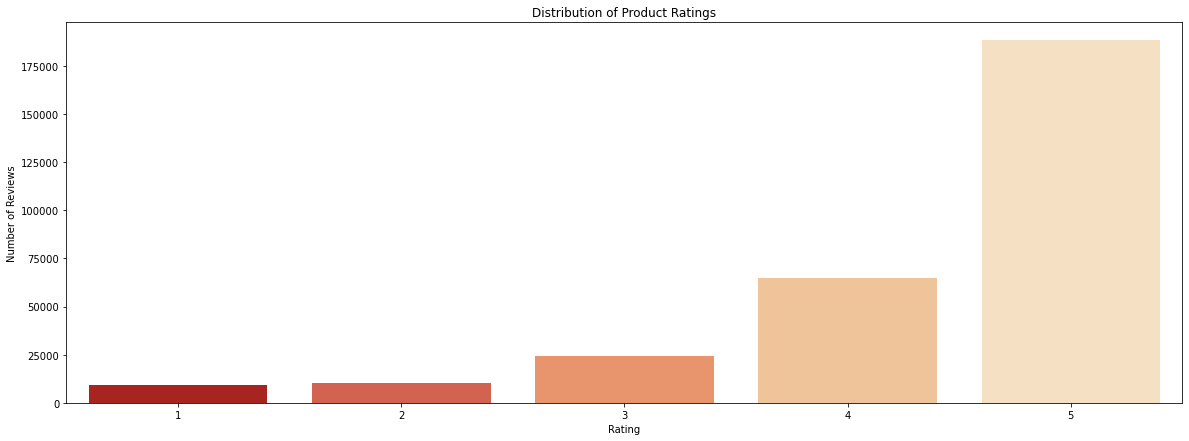

In [80]:
import seaborn as sns

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=df["overall"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()


If the model simply classified every review as 5, then an accuracy of around 63% can be achieved given this exact dataset. Since this would outperform predictions made by chance, we should therefore ensure that we stratify the testing set where we base the final score of the model.

To deal with this we will have to take into account underrepresenting the majority and/or overrepresenting the minority.

In [81]:
majority = df["overall"] == 5
majority_ratio = len(df[majority]) / len(df)

print(f"{majority_ratio*100:.2f}%")

63.51%


# Underrepresentation vs. Overrepresentation

Performing over-representation is possible by bootstrapping the minority classes to match the size of the majority classes. This can be done using K-Nearest Neighbors (KNN) or via Support Vector Machine (SVM) by clustering a given class first before generating random samples within the decision boundaries of the class. A popular module called SMOTE, or Synthetic Minority Over-sampling Technique, does exactly this. However, since the imbalance in our classes is massive, and because we have 100 dimensions for each one of our almost 300K observations, this approach is extremely computationally expensive.

Because our dataset is huge, we can afford to perform sampling in every class and still have a significant amount of data for the model. This way, we can then opt to underrepresent the majority class according to our most minority class.

In [82]:
count = len(model_df[model_df["label"] == 2])
print(f"Size of the most underrepresented class: {count}")

Size of the most underrepresented class: 10199


In choosing this route to deal with imbalance, we create a trimmed version of our dataframe, trimmed_df. Each class is trimmed to have the same number of entries as the smallest class which is Class 2.

In [83]:
#trim the majority class
condition = model_df["label"] == 5
trimmed_df = model_df[condition].sample(n=count, random_state=42)

#trim other class and add on to the trimmed_df
for rating in [1, 2, 3, 4]:
    condition = model_df["label"] == rating
    if len(model_df[condition]) >= count:
        add_df = model_df[condition].sample(n=count, random_state=42)
    else:
        add_df = model_df[condition]
    trimmed_df = pd.concat([trimmed_df, add_df], ignore_index=False)

#display new class sizes of trimmed_df
for rating in [1, 2, 3, 4, 5]:
    class_size = len(trimmed_df[trimmed_df["label"] == rating])
    print(f"Size of Class {rating}: {class_size}")

Size of Class 1: 9034
Size of Class 2: 10199
Size of Class 3: 10199
Size of Class 4: 10199
Size of Class 5: 10199


The trimmed_df is arranged by class from 1 to 5.

In [84]:
trimmed_df = trimmed_df.sort_values(by="label")
display(trimmed_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
295992,0.929102,-0.945924,-0.184655,-0.391252,0.299639,0.106275,-0.413896,0.152478,0.216484,-0.421302,...,-0.458823,1.203619,1.152686,-0.180055,0.379519,-0.791619,0.759262,0.058842,-0.779073,1
100031,0.304488,-1.296449,0.831454,0.295368,-0.716665,0.466236,0.414084,-1.175210,1.539273,0.494527,...,-1.465841,1.506837,0.373474,0.596511,1.164949,-1.811100,0.629405,0.487796,0.158210,1
100059,-0.228395,-1.043213,-1.108431,0.842631,-1.773841,0.780094,-2.211297,-0.452352,-1.377363,-0.807413,...,0.863881,-0.626418,1.389515,-1.022570,-0.622480,-1.059407,1.286240,-1.037525,1.119693,1
100077,-0.543249,0.655254,1.083855,0.709297,-0.775920,-0.807205,0.353682,-0.780531,-1.091974,0.128160,...,1.680161,-1.209048,-1.447229,1.097019,-0.185739,2.333747,0.070514,-0.103804,0.239292,1
100081,-0.955114,-1.088581,-0.653778,0.778337,0.637204,0.848618,-0.606058,0.416028,-0.335234,0.580300,...,-0.094517,0.811013,-0.198228,-1.421894,0.071971,-1.121033,0.504886,0.297647,0.262222,1


We see that we now have an almost perfectly balanced dataset after we performed underrepresentation.

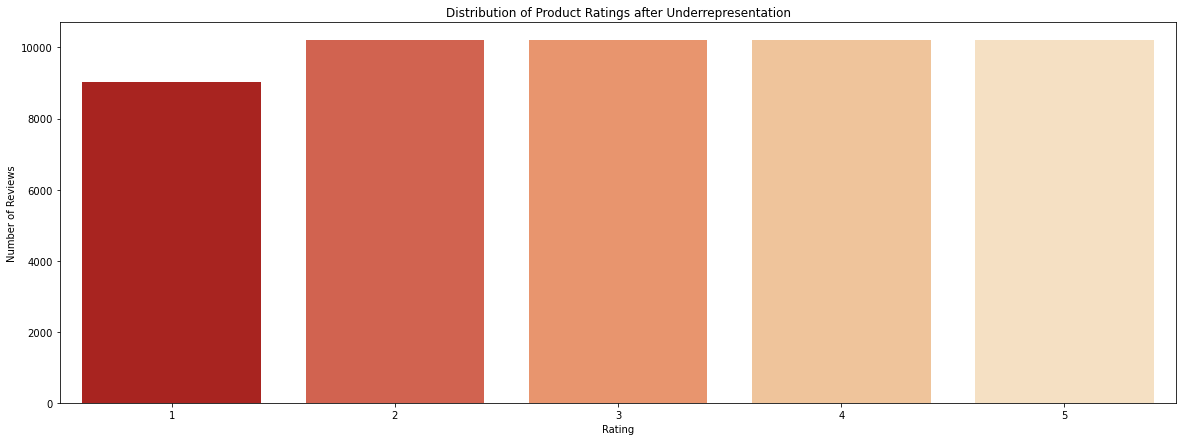

In [85]:
f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=trimmed_df["label"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings after Underrepresentation", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

## Train-Test Split

The y is our target variable or the labels for the data. The X constitutes the features and are the predictor variables.

We evenly split the training and testing sets and stratify to ensure the ratio of classes in both sets are identical.

In [87]:
from sklearn.model_selection import train_test_split

X = trimmed_df.iloc[:, :-1]
y = trimmed_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

## Scoring and Baseline

In our study, we will make use of two metrics to measure the model performance:

. Accuracy

. F1 Score

Accuracy will identify how many reviews are correctly labeled by the model. There are five ratings and thus five classes. No review can have two or more ratings and so the probability that a correct prediction is made from pure guesswork is 20%.

The F1 score is taking precision and recall into consideration. Taking into account false positives and false negatives for each class is especially important in inherently imbalanced datasets.

The baseline scores below are for when a model only randomly guesses the output labels – in this case, when every prediction is the same class. The scores are also based on an evenly distributed dataset.

In [88]:
from sklearn import metrics

label_shape = np.shape(y_test)
y_baseline = np.full(label_shape, 5)

accuracy_baseline = metrics.accuracy_score(y_test, y_baseline)
f1_score_baseline = metrics.f1_score(y_test, y_baseline, average="micro")

print(f"Baseline Accuracy: {accuracy_baseline*100:.3f}%")
print(f"Baseline F1 Score: {f1_score_baseline:.3f}")

Baseline Accuracy: 20.466%
Baseline F1 Score: 0.205


## Random Forest

Random Forest actually has a native way of supporting datasets that have class imbalance. We will therefore be able to use the original model_df instead of the sample trimmed_df:

In [89]:
from sklearn.model_selection import train_test_split

X = model_df.iloc[:, :-1]
y = model_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

The class_weight attribute is provided with a dictionary that represents the associated weight of each class – the majority class is given a 1 and the rest are given the multiplying factor at which they would level with the largest class.

In [92]:
%%time
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, class_weight={1:10, 2:12, 3:7, 4:9, 5:1}, \
                                criterion="entropy", random_state=42)
forest.fit(X_train, y_train)

Wall time: 3min 21s


RandomForestClassifier(class_weight={1: 10, 2: 12, 3: 7, 4: 9, 5: 1},
                       criterion='entropy', n_estimators=25, random_state=42)

Our tuned Random Forest model got a very high score on the training data. The confusion matrix plotted below highlighted how the model almost perfectly classified each Amazon review accordingly.



However, these scores may be misleading since they are based on the data that the model were trained on. This is highly likely a result of overfitting. It is then important to rate our model more effectively without digging into our reserved test set.

In [93]:
y_pred = forest.predict(X_train)

accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")

Training Set Accuracy: 99.848%
Training Set F1 Score: 0.998


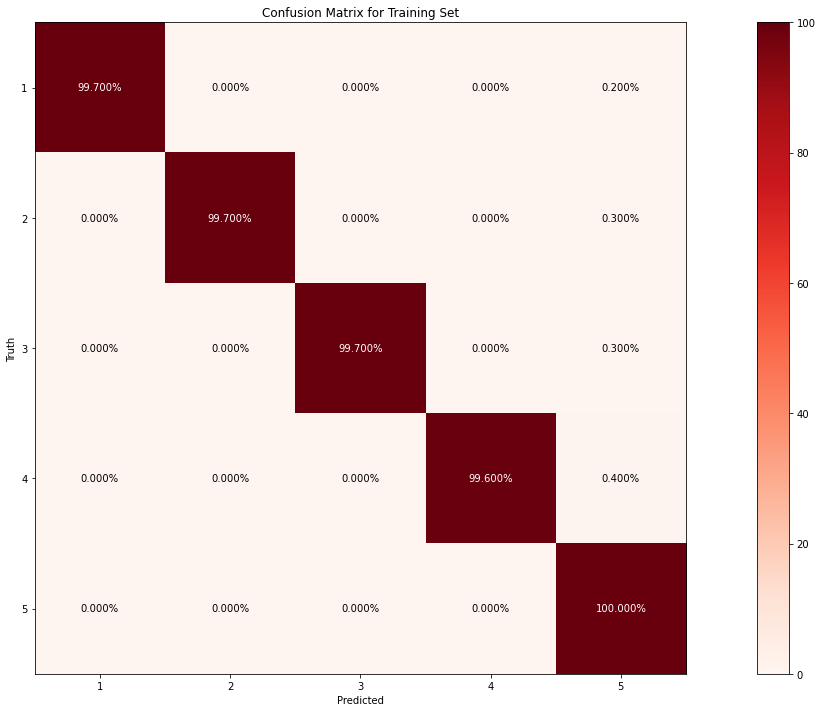

In [94]:
from sklearn.metrics import confusion_matrix

#create the confusion matrix of the training set
confusion_train = confusion_matrix(y_train, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Training Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

## Cross-Validation

Cross-validation makes the most of the training data by splitting the training set into folds and further subjecting each fold to train-test splits. Cross-validation can thus test against overfitting and the resulting scores can better reflect how the model performs on data it has not seen before.

In [95]:
from sklearn.model_selection import cross_val_score

cross_val_accuracy = cross_val_score(forest, X_train, y_train, \
                               cv=3, scoring="accuracy")
cross_val_f1 = cross_val_score(forest, X_train, y_train, \
                               cv=3, scoring="f1_micro")

cross_val_accuracy = np.mean(cross_val_accuracy)
cross_val_f1 = np.mean(cross_val_f1)

print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")
print(f"Training Set F1 Score: {cross_val_f1:.3f}")

Training Set Accuracy: 63.971%
Training Set F1 Score: 0.640


## XGBoost

Let's now try to create a model based on a popular boosting technique and see how it compares with our Random Forest model (which is a tree-based bagging approach). XGBoost has become a staple in Kaggle competitions because of its high rate of success and its ease-of-use.

The class notation for our XGBoost object boost begins from 0, and so we perform an element-wise shift of our labels from 1 to 0, from 2 to 1, from 3 to 2, etc. We tune our model using the maximum number of depths, the learning rate (eta), the number of classes, etc. We expect our outputs to be multi-class and so we select softprob as our objective.

In [100]:
%%time
import xgboost as xgb

y_train_shifted = y_train-1
y_test_shifted = y_test-1

train_set = xgb.DMatrix(X_train, label=y_train_shifted)
test_set = xgb.DMatrix(X_test, label=y_test_shifted)

parameters = {"max_depth": 10, "eta": 0.2, "silent": 1, \
              "objective": "multi:softprob", "num_class": 5}

boost = xgb.train(parameters, train_set, 100)

[19:11:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Wall time: 32min 33s


The array of predicted labels y_pred contains lists of probabilities for each class per product review. The class that is deemed most likely is chosen by the argmax and the labels are shifted back to their original state.

The micro approach in averaging the F1 score means that the false positives, true positives, and false negatives are taken into account across all classes. This is in contrast with the macro approach that instead averages the F1 scores of each class independently.

In [101]:
y_pred = boost.predict(train_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")

Training Set Accuracy: 97.540%
Training Set F1 Score: 0.975


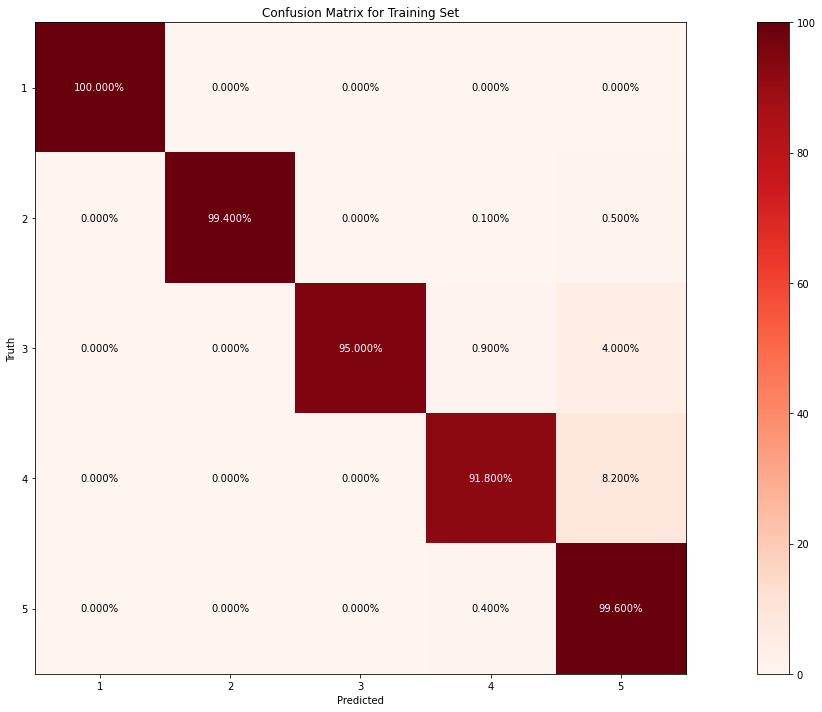

In [102]:
#create the confusion matrix of the training set
confusion_train = confusion_matrix(y_train, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Training Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

To fairly compare our boosting results with our Random Forest outcome, we perform cross-validation on three folds of the training data set as well.

However, since the XGBoost implementation we used is not supported by scikit-learn's .fit method, the cross-validation must be done using xgboost's own API. The output boost_cv is actually a pandas dataframe that tabulates the results of the cross-validation.

In [103]:
%%time
boost_cv = xgb.cv(dtrain=train_set, params=parameters, nfold=3, \
                  num_boost_round=50, early_stopping_rounds=10, \
                  metrics="merror", as_pandas=True, seed=42)

display(boost_cv.head())

[19:51:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.293759,0.001727,0.374723,0.001426
1,0.281120,0.001141,0.360436,0.001389
2,0.274746,0.001372,0.355196,0.000962
3,0.267403,0.001925,0.352752,0.000942
4,0.261337,0.001421,0.351665,0.000966


Wall time: 31min 40s


We get the training set cross-validation score by getting the merror mean on the 50th num_boost_round, which is the final boosting phase. The merror is an accuracy error rate metric meant for multi-class labels.

We can get a sense of how accurate the model is by subtracting the merror value from a perfect score of 100%.

In [104]:
cross_val_accuracy = boost_cv.iloc[-1,2]
cross_val_accuracy = 1-cross_val_accuracy

print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")

Training Set Accuracy: 66.176%


# Final Scores

Seeing that the boosting model outperformed the Random Forest approach in the three-fold cross validation, we can now apply our model on the testing set that we have put aside early on.

In [105]:
y_pred = boost.predict(test_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 66.332%
Test Set F1 Score: 0.663


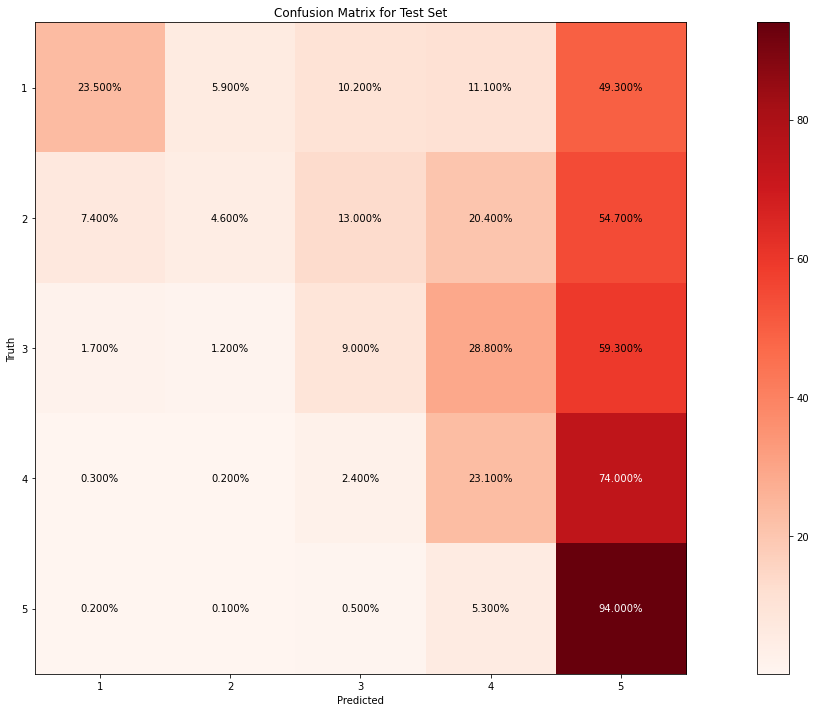

In [106]:
#create the confusion matrix of the test set
confusion_train = confusion_matrix(y_test, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Test Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

Our results above were actually based on the original model_df dataset that had the massive class imbalance. Let's now reassign our X and y variables to the balanced trimmed_df sample dataset we've created.

In [107]:
X = trimmed_df.iloc[:, :-1]
y = trimmed_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [108]:
y_train_shifted = y_train-1
y_test_shifted = y_test-1

train_set = xgb.DMatrix(X_train, label=y_train_shifted)
test_set = xgb.DMatrix(X_test, label=y_test_shifted)

y_pred = boost.predict(test_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Balanced Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Balanced Test Set F1 Score: {f1_score:.3f}")

Balanced Test Set Accuracy: 64.355%
Balanced Test Set F1 Score: 0.644


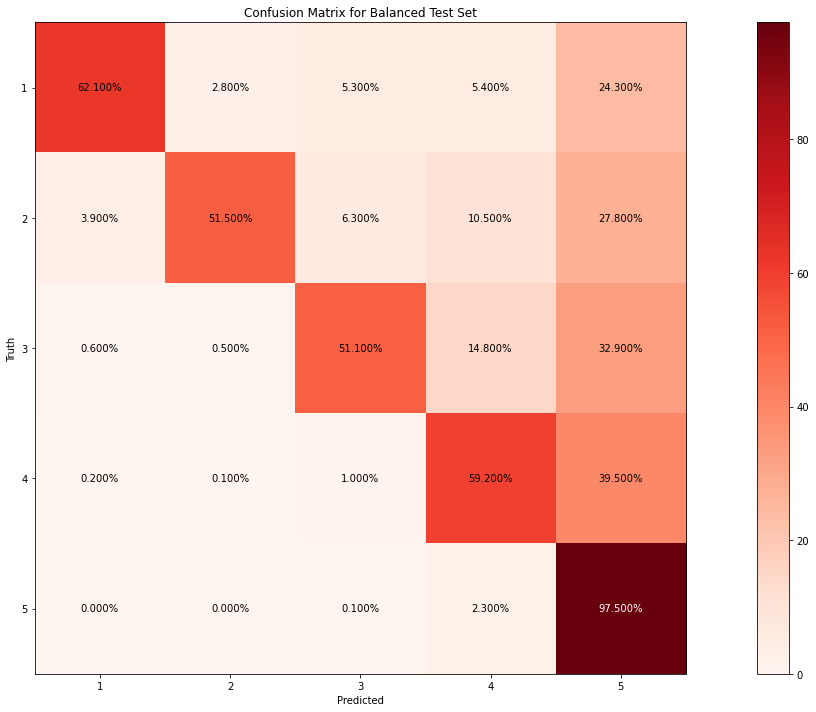

In [109]:
#create the confusion matrix of the balanced test set
confusion_train = confusion_matrix(y_test, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Balanced Test Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

At 64.4% on a perfectly balanced training data set, we have achieved a better result compared to the 20% accuracy of our baseline.

# Word Cloud

Using the true labels of the reviews, we can take the fifty most salient words in every rating and produce a word cloud. The same stop_words we derived from the NLTK library are excluded.

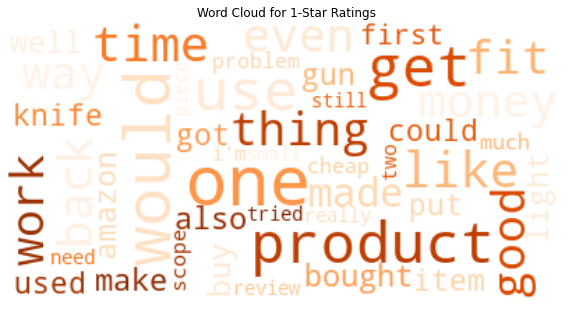

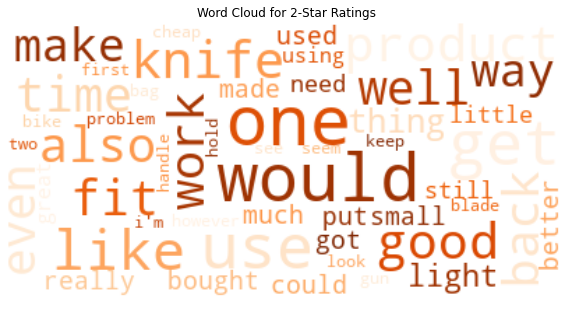

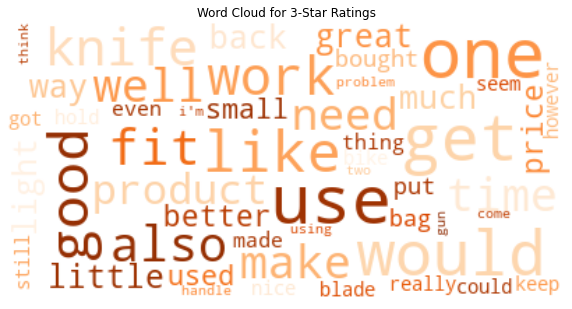

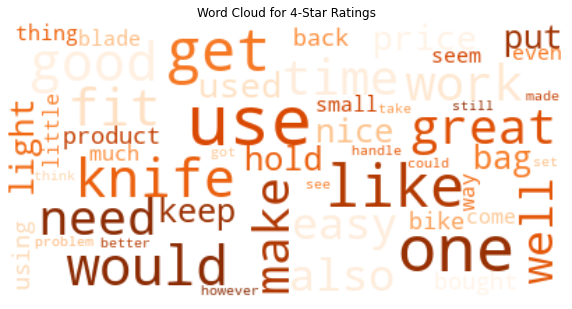

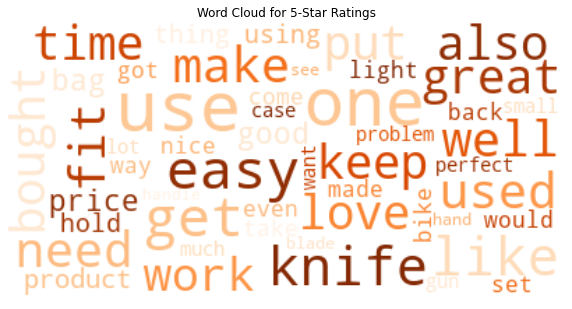

In [112]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = set(stop_words), min_font_size=10, \
                      max_font_size=50, max_words=50, \
                      background_color="white", colormap = "Oranges")

one_star_text = " ".join(df[df["overall"]==1]["reviewText"].values).lower()
two_star_text = " ".join(df[df["overall"]==2]["reviewText"].values).lower()
three_star_text = " ".join(df[df["overall"]==3]["reviewText"].values).lower()
four_star_text = " ".join(df[df["overall"]==4]["reviewText"].values).lower()
five_star_text = " ".join(df[df["overall"]==5]["reviewText"].values).lower()

text_list = [one_star_text, two_star_text, three_star_text, \
             four_star_text, five_star_text]

for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {index+1}-Star Ratings")
    plt.axis("off")
    plt.show()
